In [10]:
# Import libs

from pycaret.datasets import get_data
import matplotlib.pyplot as plt
import pandas as pd
import mlflow

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk

from nltk.tokenize import word_tokenize
from gensim import corpora, models
from sklearn.preprocessing import LabelEncoder

from wordcloud import WordCloud


In [5]:
all_datasets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [15]:
# Grab data 

df = get_data('wikipedia')

,Title,Category,Text
0,Apple Inc.,Information Technology,nasdaq 100 component s p 500 component founda...
1,than the previous version and minor positionin...,NaN,NaN
2,the life and times of macintosh the computer ...,NaN,NaN
3,Adobe Systems,Information Technology,br nasdaq 100 nasdaq 100 component br s p 500...
4,General Motors,Consumer Discretionary,s p 500 s p 500 component industry automotive...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     500 non-null    object
 1   Category  466 non-null    object
 2   Text      466 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [8]:
df[df['Text'].isna()]

,Title,Category,Text
1,than the previous version and minor positionin...,NaN,NaN
2,the life and times of macintosh the computer ...,NaN,NaN
5,like pontiac oldsmobile saturn hummer and ser...,NaN,NaN
8,softail and fxstsb bad boy softail models tha...,NaN,NaN
10,aring to bow down to a caucasian male inside o...,NaN,NaN
12,e announced in 2009 that it was planning to dr...,NaN,NaN
15,existing whistleblower lawsuit filed by paul f...,NaN,NaN
19,ths of home confinement five years of probatio...,NaN,NaN
28,ing compulsory licenses for the patents on the...,NaN,NaN
30,each section of color the word southwest appe...,NaN,NaN


In [16]:
# Get rid of rows with missing target values 

df = df.dropna(subset = ['Category'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     466 non-null    object
 1   Category  466 non-null    object
 2   Text      466 non-null    object
dtypes: object(3)
memory usage: 14.6+ KB


In [8]:
# Downlowd some nltk package, we will need it in the future 

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/masikol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/masikol/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/masikol/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
# Clean text

df['text'] = df['Title'] + ' ' + df['Text']
df = df.drop(['Title', 'Text'], axis = 1)

df['text'] = df['text'].str.lower()

df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if ord(char) < 128]))

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

df.head()

,Category,text
0,Information Technology,apple inc nasdaq 100 component p 500 component...
3,Information Technology,adobe system br nasdaq 100 nasdaq 100 componen...
4,Consumer Discretionary,general motor p 500 p 500 component industry a...
6,Energy,general electric p 500 p 500 component industr...
7,Consumer Discretionary,harleydavidson br p 500 p 500 component founda...


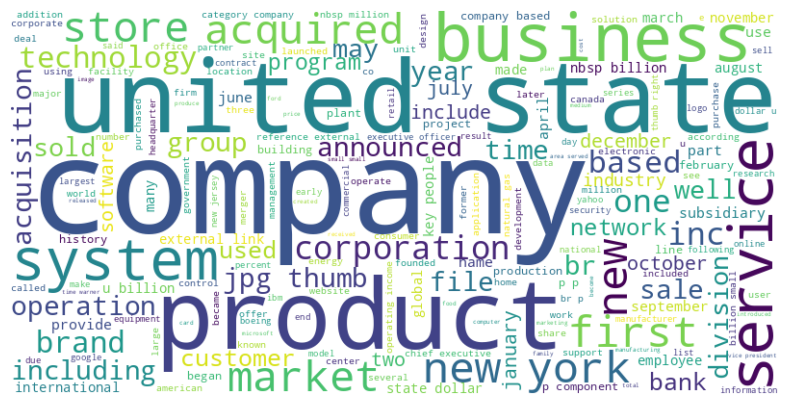

In [29]:
# Show Cloud of Words

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(' '.join(df['text']))

plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
# Get TF-IDF for each word

# TF-IDF embedding
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Get feature names (words) from TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Select top 1000 features based on TF-IDF scores
top_1000_features_indices = tfidf_matrix.sum(axis = 0).argsort()[:, -1000 :].tolist()[0]
top_1000_feature_names = [feature_names[idx] for idx in top_1000_features_indices]

# Create DataFrame with top 1000 TF-IDF features
df_bow_tfidf = pd.DataFrame(tfidf_matrix[:, top_1000_features_indices].toarray(), columns = [f'bow_tfidf_{word}' for word in top_1000_feature_names])
df = pd.concat([df, df_bow_tfidf], axis = 1)

df.head()

,Category,text,bow_tfidf_party,bow_tfidf_autozone,bow_tfidf_cummins,bow_tfidf_qualcomm,bow_tfidf_akamai,bow_tfidf_provided,bow_tfidf_alcoa,bow_tfidf_ea,...,bow_tfidf_united,bow_tfidf_http,bow_tfidf_small,bow_tfidf_new,bow_tfidf_product,bow_tfidf_bank,bow_tfidf_com,bow_tfidf_service,bow_tfidf_state,bow_tfidf_company
0,Information Technology,apple inc nasdaq 100 component p 500 component...,0.006253,0.0,0.0,0.0,0.0,0.002964,0.0,0.0,...,0.006536,0.000000,0.003522,0.026271,0.027002,0.000000,0.000000,0.014280,0.006439,0.039228
3,Information Technology,adobe system br nasdaq 100 nasdaq 100 componen...,0.003232,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.016217,0.005704,0.001820,0.045263,0.008374,0.006388,0.002791,0.021323,0.019969,0.081105
4,Consumer Discretionary,general motor p 500 p 500 component industry a...,0.000000,0.0,0.0,0.0,0.0,0.003720,0.0,0.0,...,0.004102,0.000866,0.006631,0.013740,0.002542,0.000000,0.000847,0.000996,0.004849,0.023081
6,Energy,general electric p 500 p 500 component industr...,0.000000,0.0,0.0,0.0,0.0,0.009318,0.0,0.0,...,0.008221,0.001446,0.005536,0.035182,0.033960,0.000000,0.004245,0.028270,0.009448,0.077088
7,Consumer Discretionary,harleydavidson br p 500 p 500 component founda...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.009296,0.024525,0.037564,0.000000,0.028802,0.000000,0.024002,0.000000,0.009158,0.056663


In [18]:
# Encode target value

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Category'] = encoder.fit_transform(df['Category'])

df = df.drop(['text'], axis = 1)

df.head()

,Category
0,6
3,6
4,0
6,2
7,0


In [4]:
# Enable mlflow to log experements

mlflow.autolog()

2024/03/04 11:24:23 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [5]:
from pycaret.classification import *

2024/03/04 11:24:32 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


In [40]:
s = setup(df, target = 'Category', session_id = 1212,
           log_experiment = True, experiment_name = 'wikipedia_0')

,Description,Value
0,Session id,1212
1,Target,Category
2,Target type,Multiclass
3,Original data shape,"(498, 1001)"
4,Transformed data shape,"(498, 1001)"
5,Transformed train set shape,"(348, 1001)"
6,Transformed test set shape,"(150, 1001)"
7,Numeric features,1000
8,Rows with missing values,6.4%
9,Preprocess,True


2024/03/02 17:04:11 INFO mlflow.tracking.fluent: Experiment with name 'wikipedia_0' does not exist. Creating a new experiment.


In [41]:
# Run model

model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.1582,0.2000,0.1582,0.0252,0.0435,0.0000,0.0000,0.1590
rf,Random Forest Classifier,0.1580,0.2013,0.1580,0.1502,0.1284,0.0203,0.0227,0.5250
lr,Logistic Regression,0.1496,0.2077,0.1496,0.0565,0.0707,-0.0058,-0.0114,1.0500
nb,Naive Bayes,0.1496,0.2113,0.1496,0.1256,0.1300,0.0324,0.0329,0.1160
et,Extra Trees Classifier,0.1495,0.2122,0.1495,0.1231,0.1200,0.0134,0.0140,0.4090
lda,Linear Discriminant Analysis,0.1467,0.2015,0.1467,0.1406,0.1304,0.0469,0.0484,0.2600
dt,Decision Tree Classifier,0.1385,0.2100,0.1385,0.1406,0.1323,0.0290,0.0293,0.1970
ada,Ada Boost Classifier,0.1350,0.1844,0.1350,0.0444,0.0626,-0.0063,-0.0161,0.8310
lightgbm,Light Gradient Boosting Machine,0.1323,0.2017,0.1323,0.1287,0.1195,0.0085,0.0083,17.0200
xgboost,Extreme Gradient Boosting,0.1296,0.2087,0.1296,0.1226,0.1171,0.0109,0.0106,9.3070


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [42]:
# Get no good at all
# Try to squeeze words to 250 most-importnat base on tf-idf scores

df = get_data('wikipedia')
df = df.dropna(subset = ['Category'])

df['text'] = df['Title'] + ' ' + df['Text']
df = df.drop(['Title', 'Text'], axis = 1)

df['text'] = df['text'].str.lower()

df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if ord(char) < 128]))

stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

feature_names = tfidf_vectorizer.get_feature_names_out()

top_250_features_indices = tfidf_matrix.sum(axis = 0).argsort()[:, -250 :].tolist()[0]
top_250_feature_names = [feature_names[idx] for idx in top_250_features_indices]

df_bow_tfidf = pd.DataFrame(tfidf_matrix[:, top_250_features_indices].toarray(), columns = [f'bow_tfidf_{word}' for word in top_250_feature_names])
df = pd.concat([df, df_bow_tfidf], axis = 1)

df.head()

,Title,Category,Text
0,Apple Inc.,Information Technology,nasdaq 100 component s p 500 component founda...
1,than the previous version and minor positionin...,NaN,NaN
2,the life and times of macintosh the computer ...,NaN,NaN
3,Adobe Systems,Information Technology,br nasdaq 100 nasdaq 100 component br s p 500...
4,General Motors,Consumer Discretionary,s p 500 s p 500 component industry automotive...


,Category,text,bow_tfidf_laboratory,bow_tfidf_founder,bow_tfidf_mill,bow_tfidf_former,bow_tfidf_game,bow_tfidf_september,bow_tfidf_march,bow_tfidf_digital,...,bow_tfidf_united,bow_tfidf_http,bow_tfidf_small,bow_tfidf_new,bow_tfidf_product,bow_tfidf_bank,bow_tfidf_com,bow_tfidf_service,bow_tfidf_state,bow_tfidf_company
0,Information Technology,apple inc nasdaq 100 component p 500 component...,0.000000,0.003957,0.000000,0.002293,0.000000,0.006641,0.013108,0.031019,...,0.006536,0.000000,0.003522,0.026271,0.027002,0.000000,0.000000,0.014280,0.006439,0.039228
3,Information Technology,adobe system br nasdaq 100 nasdaq 100 componen...,0.008015,0.002045,0.004243,0.000000,0.000000,0.006865,0.009034,0.003207,...,0.016217,0.005704,0.001820,0.045263,0.008374,0.006388,0.002791,0.021323,0.019969,0.081105
4,Consumer Discretionary,general motor p 500 p 500 component industry a...,0.000000,0.004967,0.000000,0.000000,0.000000,0.004168,0.000000,0.000000,...,0.004102,0.000866,0.006631,0.013740,0.002542,0.000000,0.000847,0.000996,0.004849,0.023081
6,Energy,general electric p 500 p 500 component industr...,0.000000,0.002074,0.000000,0.000000,0.027949,0.006961,0.013738,0.009753,...,0.008221,0.001446,0.005536,0.035182,0.033960,0.000000,0.004245,0.028270,0.009448,0.077088
7,Consumer Discretionary,harleydavidson br p 500 p 500 component founda...,0.000000,0.007035,0.000000,0.000000,0.081271,0.000000,0.000000,0.000000,...,0.009296,0.024525,0.037564,0.000000,0.028802,0.000000,0.024002,0.000000,0.009158,0.056663


In [44]:
df = df.dropna(subset = ['Category'])

s = setup(df, target = 'Category', session_id = 1212,
           log_experiment = True, experiment_name = 'wikipedia_1')

,Description,Value
0,Session id,1212
1,Target,Category
2,Target type,Multiclass
3,Target mapping,"Consumer Discretionary: 0, Consumer Staples: 1, Energy: 2, Financials: 3, Health Care: 4, Industrials: 5, Information Technology: 6, Materials: 7, Telecommunications Services: 8, Utilities: 9"
4,Original data shape,"(466, 252)"
5,Transformed data shape,"(466, 252)"
6,Transformed train set shape,"(326, 252)"
7,Transformed test set shape,"(140, 252)"
8,Numeric features,250
9,Categorical features,1


2024/03/02 17:16:14 INFO mlflow.tracking.fluent: Experiment with name 'wikipedia_1' does not exist. Creating a new experiment.


In [45]:
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.1688,0.0000,0.1688,0.0288,0.0491,0.0000,0.0000,0.3070
ada,Ada Boost Classifier,0.1688,0.0000,0.1688,0.0288,0.0491,0.0000,0.0000,0.4690
xgboost,Extreme Gradient Boosting,0.1688,0.0000,0.1688,0.0288,0.0491,0.0000,0.0000,1.2240
dummy,Dummy Classifier,0.1688,0.0000,0.1688,0.0288,0.0491,0.0000,0.0000,0.1650
et,Extra Trees Classifier,0.1350,0.0000,0.1350,0.0998,0.0916,-0.0184,-0.0217,0.3560
ridge,Ridge Classifier,0.1322,0.0000,0.1322,0.0743,0.0817,-0.0252,-0.0298,0.1770
rf,Random Forest Classifier,0.1230,0.0000,0.1230,0.0872,0.0916,-0.0208,-0.0219,0.5300
qda,Quadratic Discriminant Analysis,0.1230,0.0000,0.1230,0.0584,0.0597,0.0028,-0.0008,0.2250
svm,SVM - Linear Kernel,0.1196,0.0000,0.1196,0.0307,0.0357,-0.0004,-0.0122,0.2190
nb,Naive Bayes,0.1104,0.0000,0.1104,0.0124,0.0223,0.0000,0.0000,0.2060


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [53]:
# Still no good at all
# Go to LDA, so we need to classify tipics, LDA probably helps us 

df = get_data('wikipedia')
df = df.dropna(subset = ['Category'])

df['text'] = df['Title'] + ' ' + df['Text']
df = df.drop(['Title', 'Text'], axis = 1)

df['text'] = df['text'].str.lower()

df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if ord(char) < 128]))

stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

,Title,Category,Text
0,Apple Inc.,Information Technology,nasdaq 100 component s p 500 component founda...
1,than the previous version and minor positionin...,NaN,NaN
2,the life and times of macintosh the computer ...,NaN,NaN
3,Adobe Systems,Information Technology,br nasdaq 100 nasdaq 100 component br s p 500...
4,General Motors,Consumer Discretionary,s p 500 s p 500 component industry automotive...


In [54]:
# Apply LDA

df['tokens'] = df['text'].apply(lambda x: word_tokenize(x))
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

lda_model = models.LdaModel(corpus, num_topics = 20, id2word = dictionary, passes = 15)

df['topics'] = df['tokens'].apply(lambda x: lda_model[dictionary.doc2bow(x)])

for i in range(20):
    df[f'topic_{i + 1}'] = df['topics'].apply(lambda x: next((prob for topic, prob in x if topic == i), 0.0))

df.drop(['tokens', 'topics', 'text'], axis = 1, inplace = True)

In [55]:
df.head()

,Category,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20
0,Information Technology,0.450442,0.0,0.0,0.549312,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0
3,Information Technology,0.000000,0.0,0.0,0.999673,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0
4,Consumer Discretionary,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.948578,0.0,0.0,0.0,0.0,0.0,0.05119,0.000000,0.000000,0.0
6,Energy,0.000000,0.0,0.0,0.678107,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.272817,0.0
7,Consumer Discretionary,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.998531,0.000000,0.0


In [56]:
# For same reason it raise error if i do not drop NAN again...

df = df.dropna(subset = ['Category'])

s = setup(df, target = 'Category', session_id = 1212,
           log_experiment = True, experiment_name = 'wikipedia_3')

,Description,Value
0,Session id,1212
1,Target,Category
2,Target type,Multiclass
3,Target mapping,"Consumer Discretionary: 0, Consumer Staples: 1, Energy: 2, Financials: 3, Health Care: 4, Industrials: 5, Information Technology: 6, Materials: 7, Telecommunications Services: 8, Utilities: 9"
4,Original data shape,"(466, 21)"
5,Transformed data shape,"(466, 21)"
6,Transformed train set shape,"(326, 21)"
7,Transformed test set shape,"(140, 21)"
8,Numeric features,20
9,Preprocess,True


2024/03/02 17:25:19 INFO mlflow.tracking.fluent: Experiment with name 'wikipedia_3' does not exist. Creating a new experiment.


In [57]:
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.3895,0.0000,0.3895,0.3702,0.3650,0.3023,0.3080,0.2810
gbc,Gradient Boosting Classifier,0.3840,0.0000,0.3840,0.3774,0.3645,0.2936,0.2995,1.2030
ridge,Ridge Classifier,0.3837,0.0000,0.3837,0.3365,0.3285,0.2800,0.2998,0.0470
lr,Logistic Regression,0.3835,0.0000,0.3835,0.3261,0.3247,0.2776,0.2975,0.9680
xgboost,Extreme Gradient Boosting,0.3806,0.0000,0.3806,0.3554,0.3522,0.2905,0.2967,0.2720
lda,Linear Discriminant Analysis,0.3655,0.0000,0.3655,0.3712,0.3430,0.2809,0.2897,0.0470
et,Extra Trees Classifier,0.3593,0.0000,0.3593,0.3642,0.3413,0.2692,0.2744,0.2030
lightgbm,Light Gradient Boosting Machine,0.3588,0.0000,0.3588,0.3451,0.3360,0.2664,0.2724,0.9280
knn,K Neighbors Classifier,0.3533,0.0000,0.3533,0.3298,0.3246,0.2518,0.2587,0.0550
dt,Decision Tree Classifier,0.3438,0.0000,0.3438,0.3409,0.3218,0.2497,0.2570,0.0500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [61]:
# Get much better resualts
# Try ti increase number of topics to 50

df = get_data('wikipedia')
df = df.dropna(subset = ['Category'])

df['text'] = df['Title'] + ' ' + df['Text']
df = df.drop(['Title', 'Text'], axis = 1)

df['text'] = df['text'].str.lower()

df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if ord(char) < 128]))

stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

df['tokens'] = df['text'].apply(lambda x: word_tokenize(x))
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

lda_model = models.LdaModel(corpus, num_topics = 50, id2word = dictionary, passes = 15)

df['topics'] = df['tokens'].apply(lambda x: lda_model[dictionary.doc2bow(x)])

for i in range(50):
    df[f'topic_{i + 1}'] = df['topics'].apply(lambda x: next((prob for topic, prob in x if topic == i), 0.0))

df.drop(['tokens', 'topics', 'text'], axis = 1, inplace = True)

df.head()

,Title,Category,Text
0,Apple Inc.,Information Technology,nasdaq 100 component s p 500 component founda...
1,than the previous version and minor positionin...,NaN,NaN
2,the life and times of macintosh the computer ...,NaN,NaN
3,Adobe Systems,Information Technology,br nasdaq 100 nasdaq 100 component br s p 500...
4,General Motors,Consumer Discretionary,s p 500 s p 500 component industry automotive...


,Category,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49,topic_50
0,Information Technology,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.033727,0.0,0.0,0.0,0.0,0.00000,0.0
3,Information Technology,0.000000,0.0,0.0,0.0,0.217428,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.03431,0.0
4,Consumer Discretionary,0.000000,0.0,0.0,0.0,0.024396,0.0,0.0,0.0,0.0,...,0.000000,0.754929,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0
6,Energy,0.090648,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0
7,Consumer Discretionary,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.999739,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0


In [62]:
df = df.dropna(subset = ['Category'])

s = setup(df, target = 'Category', session_id = 1212,
           log_experiment = True, experiment_name = 'wikipedia_4')

,Description,Value
0,Session id,1212
1,Target,Category
2,Target type,Multiclass
3,Target mapping,"Consumer Discretionary: 0, Consumer Staples: 1, Energy: 2, Financials: 3, Health Care: 4, Industrials: 5, Information Technology: 6, Materials: 7, Telecommunications Services: 8, Utilities: 9"
4,Original data shape,"(466, 51)"
5,Transformed data shape,"(466, 51)"
6,Transformed train set shape,"(326, 51)"
7,Transformed test set shape,"(140, 51)"
8,Numeric features,50
9,Preprocess,True


In [63]:
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5278,0.0000,0.5278,0.5156,0.4996,0.4583,0.4657,0.2430
gbc,Gradient Boosting Classifier,0.5155,0.0000,0.5155,0.5071,0.4919,0.4456,0.4511,1.3580
et,Extra Trees Classifier,0.5099,0.0000,0.5099,0.5086,0.4841,0.4394,0.4459,0.2440
xgboost,Extreme Gradient Boosting,0.4972,0.0000,0.4972,0.5052,0.4853,0.4259,0.4304,0.3770
svm,SVM - Linear Kernel,0.4517,0.0000,0.4517,0.4673,0.4280,0.3724,0.3841,0.1300
lightgbm,Light Gradient Boosting Machine,0.4449,0.0000,0.4449,0.4250,0.4175,0.3651,0.3706,0.8160
dt,Decision Tree Classifier,0.4418,0.0000,0.4418,0.4511,0.4285,0.3631,0.3690,0.0620
ridge,Ridge Classifier,0.4270,0.0000,0.4270,0.3961,0.3969,0.3411,0.3474,0.0590
lda,Linear Discriminant Analysis,0.4180,0.0000,0.4180,0.4433,0.4096,0.3387,0.3434,0.0510
lr,Logistic Regression,0.3869,0.0000,0.3869,0.3531,0.3493,0.2882,0.2965,0.0620


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [28]:
# Excellent
# Now get rid of classes disbalance 

encoder = LabelEncoder()

df = get_data('wikipedia')
df = df.dropna(subset = ['Category'])
df['Category'] = encoder.fit_transform(df['Category'])

df['text'] = df['Title'] + ' ' + df['Text']
df = df.drop(['Title', 'Text'], axis = 1)

df['text'] = df['text'].str.lower()

df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if ord(char) < 128]))

stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

df.head()

,Title,Category,Text
0,Apple Inc.,Information Technology,nasdaq 100 component s p 500 component founda...
1,than the previous version and minor positionin...,NaN,NaN
2,the life and times of macintosh the computer ...,NaN,NaN
3,Adobe Systems,Information Technology,br nasdaq 100 nasdaq 100 component br s p 500...
4,General Motors,Consumer Discretionary,s p 500 s p 500 component industry automotive...


,Category,text
0,6,apple inc nasdaq 100 component p 500 component...
3,6,adobe system br nasdaq 100 nasdaq 100 componen...
4,0,general motor p 500 p 500 component industry a...
6,2,general electric p 500 p 500 component industr...
7,0,harleydavidson br p 500 p 500 component founda...


In [29]:
# Keep 50 topics

df['tokens'] = df['text'].apply(lambda x: word_tokenize(x))
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

num_topics = 50

lda_model = models.LdaModel(corpus, num_topics = num_topics, id2word = dictionary, passes = 20)

df['topics'] = df['tokens'].apply(lambda x: lda_model[dictionary.doc2bow(x)])

for i in range(num_topics):
    df[f'topic_{i + 1}'] = df['topics'].apply(lambda x: next((prob for topic, prob in x if topic == i), 0.0))

df.drop(['tokens', 'topics', 'text'], axis = 1, inplace = True)

df.head()

,Category,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49,topic_50
0,6,0.0,0.0,0.0,0.0,0.0,0.028053,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.720385,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.013619,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.019549,0.0,0.0,0.067417,0.0,0.0,0.0,0.0
7,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [150]:
df['Category'].value_counts()

3    78
0    76
6    59
5    59
4    52
2    44
1    35
7    30
9    28
8     5
Name: Category, dtype: int64

In [30]:
# Leave 44 samples for each type
# it contain as upsamplind & downsampling

target_count = 44

resampled_df = pd.DataFrame()

for category in df['Category'].unique():
    category_subset = df[df['Category'] == category]

    if len(category_subset) < target_count:
        resampled_category = resample(category_subset, replace = True, n_samples = target_count)
    else:
        resampled_category = category_subset.sample(target_count)

    resampled_df = pd.concat([resampled_df, resampled_category], ignore_index = True)

resampled_df['Category'].value_counts()

Category
6    44
0    44
2    44
3    44
1    44
5    44
4    44
7    44
9    44
8    44
Name: count, dtype: int64

In [32]:
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 51 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  440 non-null    int64  
 1   topic_1   440 non-null    float64
 2   topic_2   440 non-null    float64
 3   topic_3   440 non-null    float64
 4   topic_4   440 non-null    float64
 5   topic_5   440 non-null    float64
 6   topic_6   440 non-null    float64
 7   topic_7   440 non-null    float64
 8   topic_8   440 non-null    float64
 9   topic_9   440 non-null    float64
 10  topic_10  440 non-null    float64
 11  topic_11  440 non-null    float64
 12  topic_12  440 non-null    float64
 13  topic_13  440 non-null    float64
 14  topic_14  440 non-null    float64
 15  topic_15  440 non-null    float64
 16  topic_16  440 non-null    float64
 17  topic_17  440 non-null    float64
 18  topic_18  440 non-null    float64
 19  topic_19  440 non-null    float64
 20  topic_20  440 non-null    float6

In [36]:
resampled_df = resampled_df.dropna(subset = ['Category'])

s = setup(resampled_df, target = 'Category', session_id = 1212, index = False,
           log_experiment = True, experiment_name = 'wikipedia_6')

,Description,Value
0,Session id,1212
1,Target,Category
2,Target type,Multiclass
3,Original data shape,"(440, 51)"
4,Transformed data shape,"(440, 51)"
5,Transformed train set shape,"(308, 51)"
6,Transformed test set shape,"(132, 51)"
7,Numeric features,50
8,Preprocess,True
9,Imputation type,simple


2024/03/04 11:00:45 INFO mlflow.tracking.fluent: Experiment with name 'wikipedia_6' does not exist. Creating a new experiment.


In [37]:
model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:00:51
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6654,0.9086,0.6654,0.6840,0.6527,0.6279,0.6327,0.2780
et,Extra Trees Classifier,0.6652,0.8929,0.6652,0.6747,0.6492,0.6278,0.6333,0.2660
gbc,Gradient Boosting Classifier,0.6529,0.8918,0.6529,0.6898,0.6458,0.6144,0.6199,1.0220
lightgbm,Light Gradient Boosting Machine,0.6391,0.9123,0.6391,0.6824,0.6375,0.5989,0.6046,34.3150
dt,Decision Tree Classifier,0.6101,0.7833,0.6101,0.6226,0.5962,0.5667,0.5727,0.0670
ridge,Ridge Classifier,0.5230,0.0000,0.5230,0.4891,0.4834,0.4700,0.4770,0.0590
lda,Linear Discriminant Analysis,0.5166,0.8251,0.5166,0.5155,0.4845,0.4628,0.4707,0.0600
lr,Logistic Regression,0.5035,0.8570,0.5035,0.4764,0.4697,0.4484,0.4560,1.3020
svm,SVM - Linear Kernel,0.4676,0.0000,0.4676,0.4716,0.4296,0.4085,0.4212,0.0840
nb,Naive Bayes,0.4446,0.7636,0.4446,0.4321,0.4028,0.3831,0.3941,0.0580


In [11]:
# Try less topics

encoder = LabelEncoder()

df = get_data('wikipedia')
df = df.dropna(subset = ['Category'])
df['Category'] = encoder.fit_transform(df['Category'])

df['text'] = df['Title'] + ' ' + df['Text']
df = df.drop(['Title', 'Text'], axis = 1)

df['text'] = df['text'].str.lower()

df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df['text'] = df['text'].apply(lambda x: ''.join([char for char in x if ord(char) < 128]))

stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# May be 50 too much

df['tokens'] = df['text'].apply(lambda x: word_tokenize(x))
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

num_topics = 30

lda_model = models.LdaModel(corpus, num_topics = num_topics, id2word = dictionary, passes = 20)

df['topics'] = df['tokens'].apply(lambda x: lda_model[dictionary.doc2bow(x)])

for i in range(num_topics):
    df[f'topic_{i + 1}'] = df['topics'].apply(lambda x: next((prob for topic, prob in x if topic == i), 0.0))

df.drop(['tokens', 'topics', 'text'], axis = 1, inplace = True)

target_count = 59

resampled_df = pd.DataFrame()

for category in df['Category'].unique():
    category_subset = df[df['Category'] == category]

    if len(category_subset) < target_count:
        resampled_category = resample(category_subset, replace = True, n_samples = target_count)
    else:
        resampled_category = category_subset.sample(target_count)

    resampled_df = pd.concat([resampled_df, resampled_category], ignore_index = True)

resampled_df['Category'].value_counts()

df.head()

,Title,Category,Text
0,Apple Inc.,Information Technology,nasdaq 100 component s p 500 component founda...
1,than the previous version and minor positionin...,NaN,NaN
2,the life and times of macintosh the computer ...,NaN,NaN
3,Adobe Systems,Information Technology,br nasdaq 100 nasdaq 100 component br s p 500...
4,General Motors,Consumer Discretionary,s p 500 s p 500 component industry automotive...


,Category,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30
0,6,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.015285,0.000000,0.053390,0.000000,0.0,0.0,0.000000,0.0
3,6,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.020758,...,0.000000,0.0,0.000000,0.000000,0.383187,0.572735,0.0,0.0,0.000000,0.0
4,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
6,2,0.0,0.000000,0.0,0.0,0.047118,0.0,0.051366,0.0,0.013383,...,0.214964,0.0,0.000000,0.078858,0.092886,0.000000,0.0,0.0,0.324629,0.0
7,0,0.0,0.999742,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [12]:
resampled_df = resampled_df.dropna(subset = ['Category'])

s = setup(resampled_df, target = 'Category', session_id = 1212, index = False,
           log_experiment = True, experiment_name = 'wikipedia_7')

,Description,Value
0,Session id,1212
1,Target,Category
2,Target type,Multiclass
3,Original data shape,"(590, 31)"
4,Transformed data shape,"(590, 31)"
5,Transformed train set shape,"(413, 31)"
6,Transformed test set shape,"(177, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [13]:
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7286,0.9318,0.7286,0.7530,0.7169,0.6984,0.7028,0.1970
gbc,Gradient Boosting Classifier,0.7166,0.9238,0.7166,0.7256,0.7062,0.6849,0.6883,0.8140
et,Extra Trees Classifier,0.7093,0.9266,0.7093,0.7178,0.6930,0.6769,0.6813,0.1810
dt,Decision Tree Classifier,0.6997,0.8331,0.6997,0.7136,0.6820,0.6661,0.6709,0.0350
lightgbm,Light Gradient Boosting Machine,0.6682,0.9345,0.6682,0.6768,0.6523,0.6310,0.6360,45.8270
knn,K Neighbors Classifier,0.5132,0.8347,0.5132,0.5221,0.4873,0.4591,0.4661,0.0470
lr,Logistic Regression,0.4891,0.8533,0.4891,0.4637,0.4509,0.4325,0.4421,0.7580
lda,Linear Discriminant Analysis,0.4747,0.8336,0.4747,0.4732,0.4480,0.4163,0.4238,0.0530
ridge,Ridge Classifier,0.4697,0.0000,0.4697,0.4144,0.4154,0.4108,0.4220,0.0370
nb,Naive Bayes,0.4575,0.7878,0.4575,0.4081,0.4009,0.3970,0.4062,0.0350


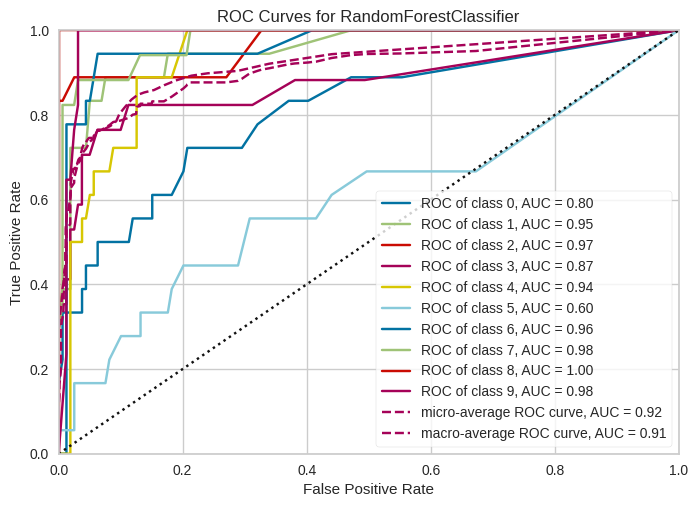

In [14]:
# Get much better resuats
# Plot some helpfull graohics

plot_model(model, plot = 'auc')

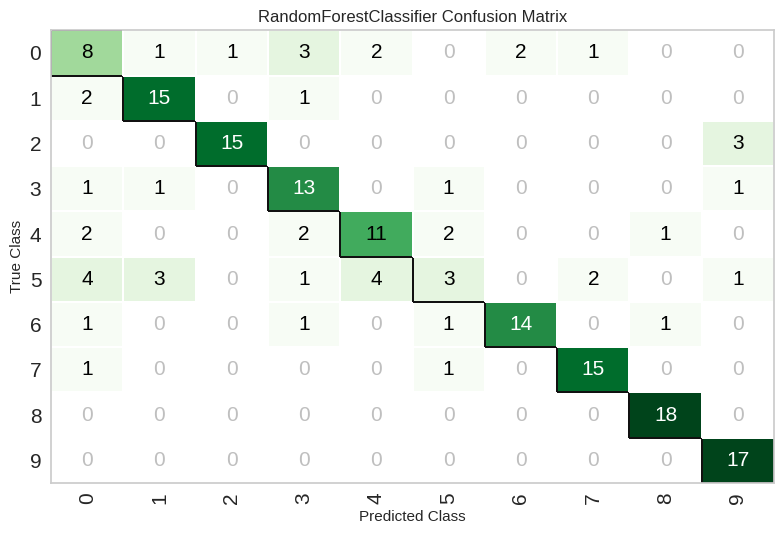

In [15]:
plot_model(model, plot = 'confusion_matrix')

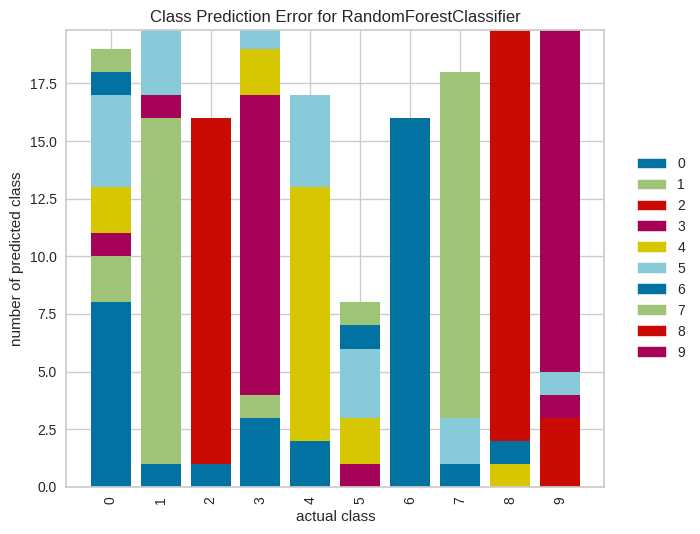

In [16]:
plot_model(model, plot = 'error')

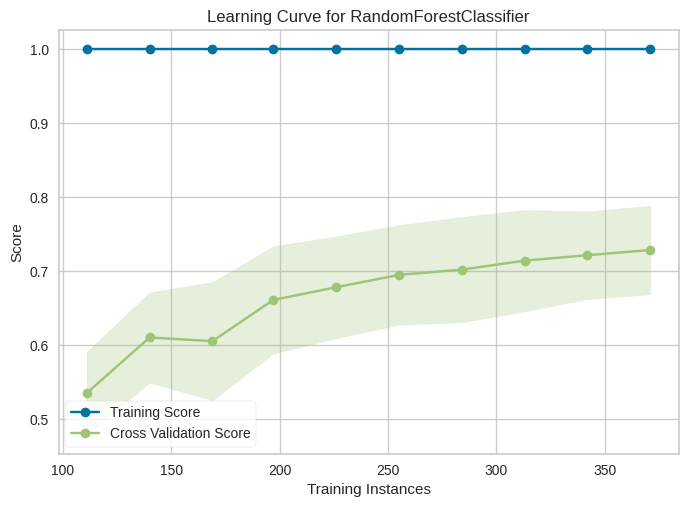

In [17]:
plot_model(model, plot = 'learning')

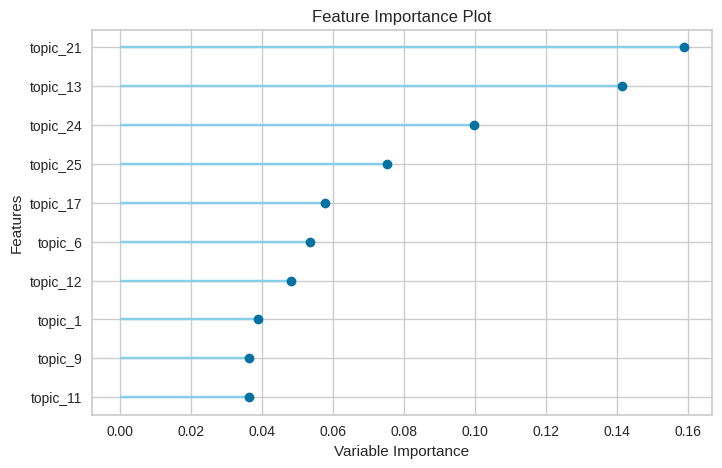

In [18]:
plot_model(model, plot = 'feature')

And show mlflow screenshot

![](NLP_AutoML.png)